# Introduction & Problem Statement

### Objective
#### The objective of this project is to develop a machine learning model to predict insurance charges based on personal and demographic information about the policyholders. Since the target variable, charges, is a continuous value, this is framed as a regression task.
### Business Value
#### Accurately predicting insurance charges provides significant business value to insurance companies:

- #### Risk Estimation: Helps insurers assess the expected medical costs of new customers.

- #### Premium Setting: Supports more accurate and fair pricing of insurance premiums.

- #### Cost Management: Identifies high-cost risk factors that may require mitigation strategies.

- #### Customer Insights: Helps understand how personal characteristics (such as age, BMI, smoking habits) influence charges, enabling data-driven decision-making.

### Scope
#### In this project, I will:

- #### Explore and analyze the data to uncover important patterns.
- #### Build and evaluate multiple regression models.
- #### Specifically train and evaluate a Linear Regression model (per DevHub requirements).
- #### Visualize how BMI, Age, and Smoking Status impact insurance charges.
- #### Provide business-friendly insights and recommendations based on the findings.

# Dataset Understanding & Description

## Dataset Overview
#### The dataset contains personal and demographic information of insurance policyholders, along with their corresponding medical insurance charges. It will be used to analyze how various factors impact the cost of insurance and to build predictive models.

### Business Context:
#### Understanding how different features such as age, BMI, and smoking status affect charges can help insurance companies:

- #### Set premiums fairly

- #### Understand risk drivers

- #### Design targeted interventions for high-risk groups

# Loading & Inspection

## Loading the Data & importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load_csv
df = pd.read_csv('insurance.csv')
## Prevoew
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic Inspection

In [11]:
# Shape of the dataset
print("Shape: ",df.shape)

# Column names
df.columns.tolist()

Shape:  (1338, 7)


['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [12]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
# Descriptive statistics of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Check for Missing Values

In [15]:
# Missing values count
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
# Number of duplicate rows
df.duplicated().sum()

1

In [17]:
df = df.drop_duplicates()

### Small Summary
#### Summary of Initial Inspection:

- #### The dataset contains 1338 rows and 7 columns.

- #### No missing values were found. 

- #### ! duplicate rows were detected. which is now removed.

- #### Data types appear appropriate for modeling:

- #### Numeric: age, bmi, children, charges

- #### Categorical: sex, smoker, region

- #### No major data quality issues observed at this stage.

# Exploratory Data Analysis (EDA)

## Target Variable (charges) Distribution

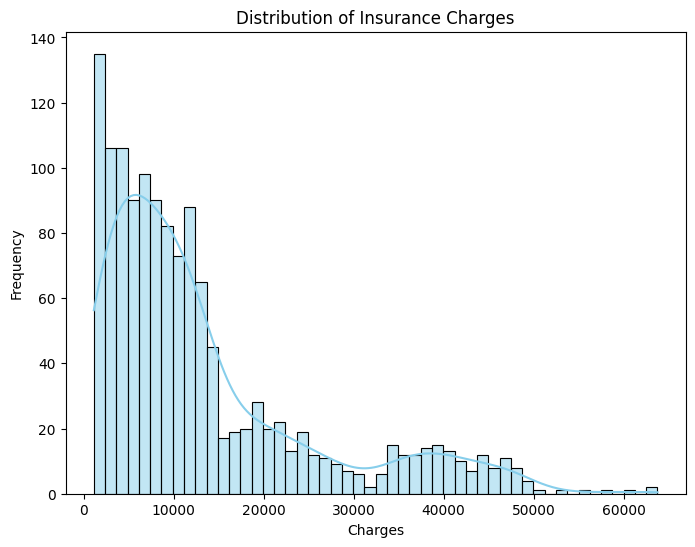

In [21]:
# Plot charges distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Distribution of Insurance Charges
#### The distribution of insurance charges is right-skewed, with the majority of charges concentrated between 0 and 5,000. Most policyholders incur low to moderate costs, while a small number face high charges extending up to 60,000. This suggests that while typical costs are manageable, there is a minority of customers with significantly higher medical expenses, which may represent higher risk for insurers.

In [23]:
# Skewness
df['charges'].skew()

1.5153909108403483

## Countplots to Understand Distribution of sex, region, smoker

C:\Users\HOME\AppData\Local\Temp\ipykernel_6124\3670750515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


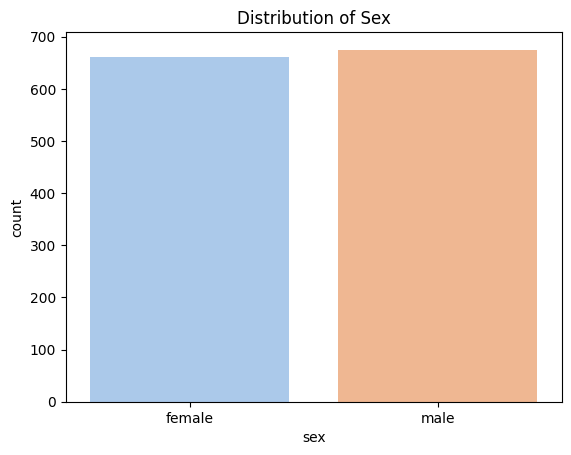

In [25]:
# Sex
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribution of Sex')
plt.show()

### Distribution of Sex
#### The dataset shows a nearly balanced gender distribution, with a slight predominance of males (~675) over females (~650). This balance ensures that model outcomes are unlikely to be biased by gender representation in the data.

C:\Users\HOME\AppData\Local\Temp\ipykernel_6124\1799217028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='pastel')


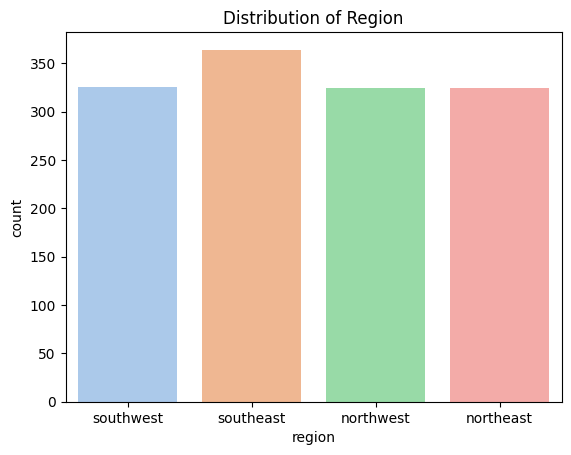

In [27]:
# Region
sns.countplot(x='region', data=df, palette='pastel')
plt.title('Distribution of Region')
plt.show()


### Distribution of Region
#### The data indicates that non-smokers (1100) substantially outnumber smokers (250), with an approximate ratio of 4:1. This skew highlights that while most policyholders are non-smokers, the presence of smokers remains an important segment to monitor, as smoking behavior is known to significantly impact insurance costs.

C:\Users\HOME\AppData\Local\Temp\ipykernel_6124\432824093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='pastel')


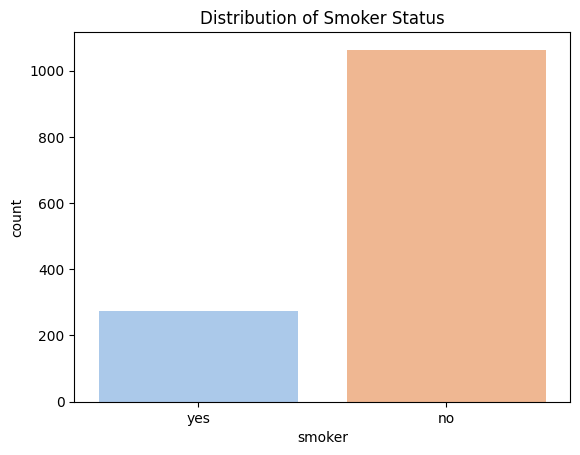

In [29]:
# Smoker
sns.countplot(x='smoker', data=df, palette='pastel')
plt.title('Distribution of Smoker Status')
plt.show()

### Distribution of Smoker Status
### The distribution confirms that non-smokers (1000) considerably outnumber smokers (300), with a ratio of approximately 3:1. Given the strong relationship between smoking and medical expenses, this imbalance will be important to consider when interpreting model results and assessing risk profiles.

## Histograms + KDE for age, bmi, children, charges

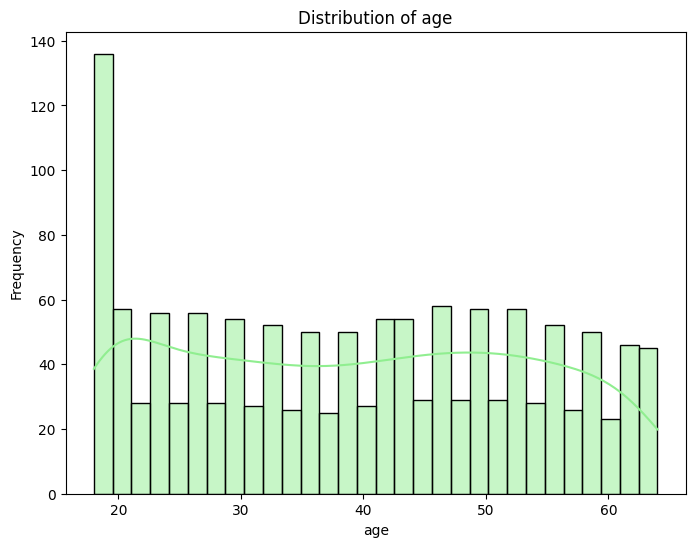

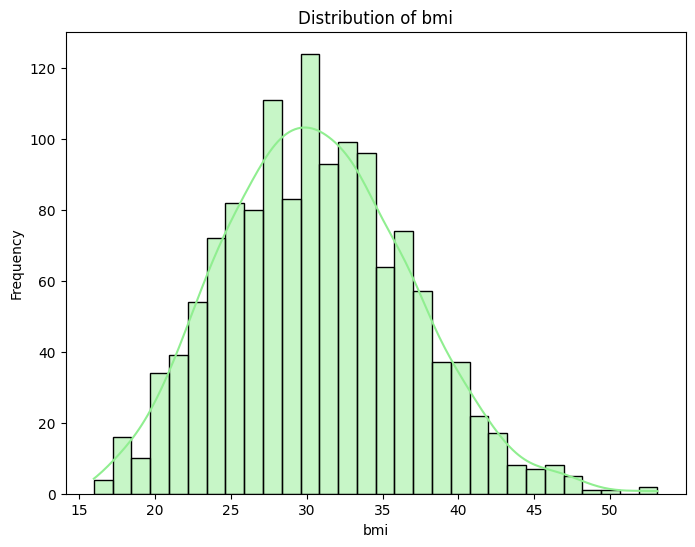

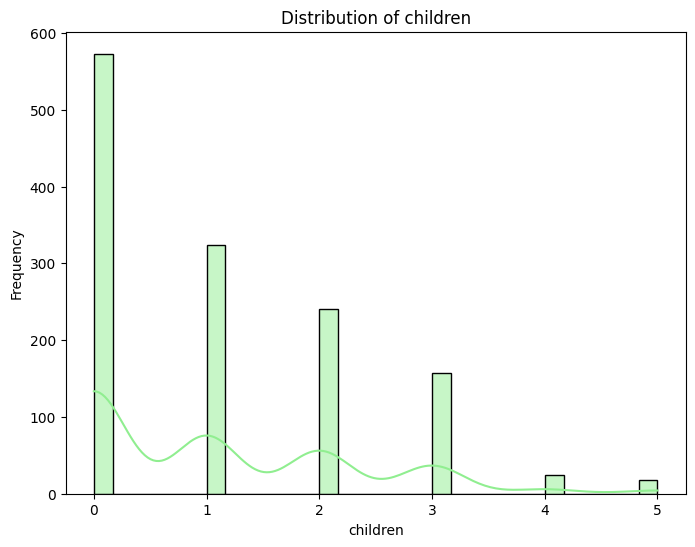

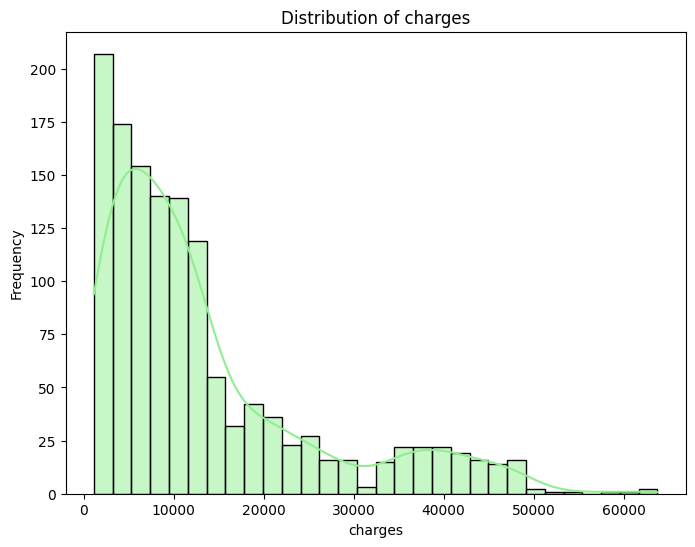

In [32]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='lightgreen', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Distribution of Age
### The age distribution is right-skewed, with the highest concentration of policyholders in the younger age group (~20 years). The number of individuals steadily decreases with age, particularly beyond 40 years. This suggests that the insurer's customer base is predominantly younger, which may influence overall risk exposure and typical healthcare costs.

### Distribution of BMI
#### The BMI distribution follows a slightly right-skewed bell-shaped curve, peaking between 30 and 35. This indicates that most individuals fall within the overweight to mildly obese range, with fewer policyholders exhibiting very low or very high BMI values. Since BMI is a known health risk factor, this distribution will be important when assessing its relationship with insurance charges.

### Distribution of Number of Children
#### The number of children is heavily skewed toward zero, with a majority of policyholders reporting no children. The frequency declines sharply for those with 1 or more children, and very few individuals report 4 or 5 children. This pattern suggests that most insured individuals either have no dependents or a small number of dependents, which can influence the cost structure of insurance policies.

## Bivariate Analysis

### Boxplots: charges vs sex, smoker, region

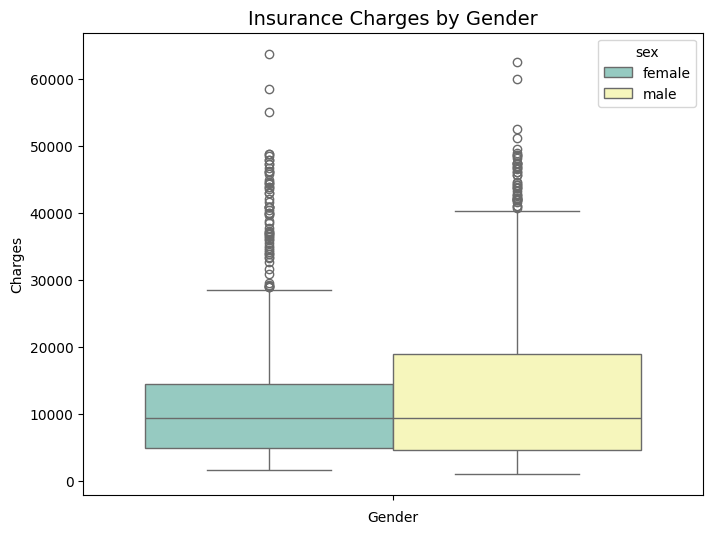

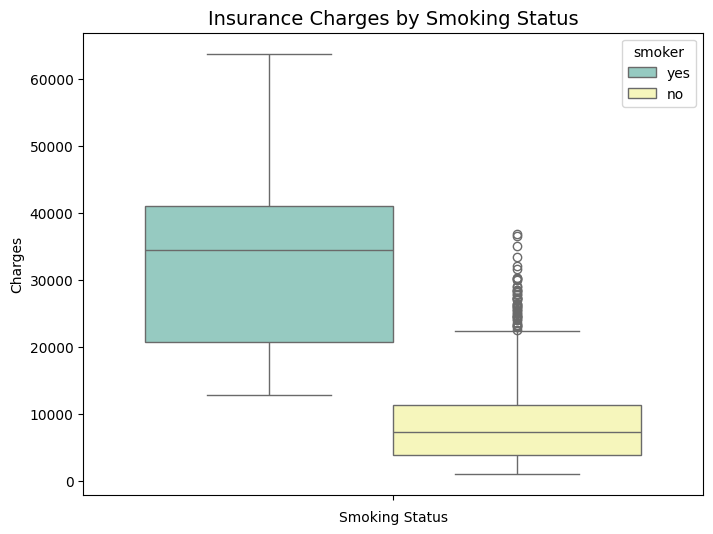

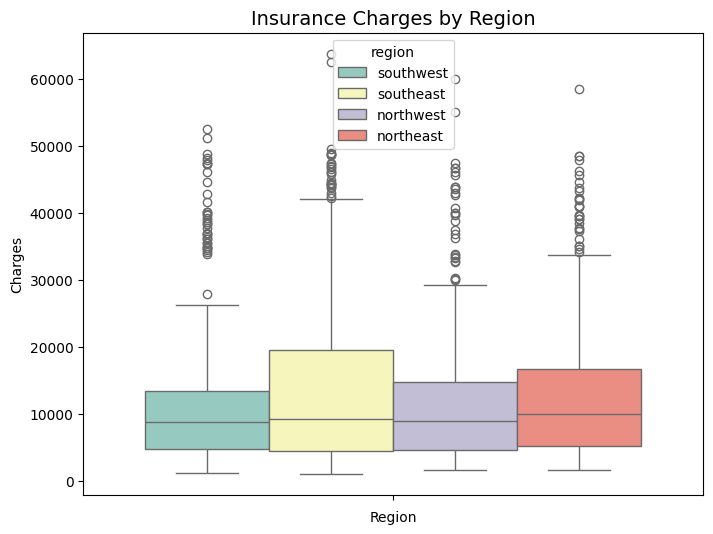

In [36]:
# Charges vs Sex
plt.figure(figsize=(8, 6))
sns.boxplot(hue='sex', y='charges', data=df, palette='Set3')
plt.title('Insurance Charges by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

# Charges vs Smoker
plt.figure(figsize=(8, 6))
sns.boxplot(hue='smoker', y='charges', data=df, palette='Set3')
plt.title('Insurance Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

# Charges vs Region
plt.figure(figsize=(8, 6))
sns.boxplot(hue='region', y='charges', data=df, palette='Set3')
plt.title('Insurance Charges by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

### Insurance Charges by Gender
#### Both males and females exhibit a similar median insurance charge of approximately 12,000–15,000. However, there is substantial variability within each gender, with extreme outliers extending up to 50,000–60,000. Males appear to have slightly more extreme outliers, but overall, gender does not seem to be a primary driver of insurance cost variability.

### Insurance Charges by Smoking Status
#### Smoking status has a strong impact on insurance charges. Smokers show a much higher median charge of approximately 35,000–40,000, compared to non-smokers whose median charge is around 10,000–12,000. Smokers also exhibit outliers reaching up to 60,000, whereas non-smokers’ outliers typically extend only to 40,000. This confirms that smoking is a major risk factor leading to significantly higher medical costs.

### Insurance Charges by Region
#### Insurance charges are fairly consistent across all regions (Southwest, Southeast, Northwest, Northeast), with median charges around 12,000–15,000 in each region. While extreme outliers are present in all regions (reaching up to 50,000–60,000), there is no clear regional pattern driving large differences in typical insurance costs. Thus, region appears to have limited influence on insurance charge variability.

### Boxplot: charges vs children

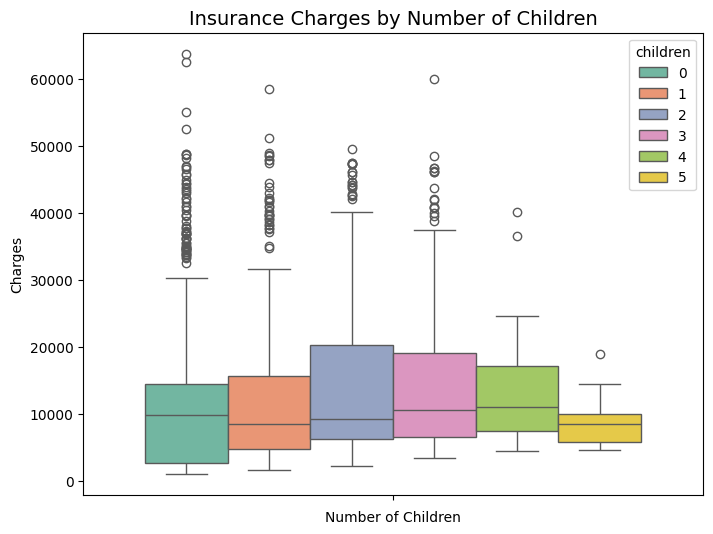

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue='children', y='charges', data=df, palette='Set2')
plt.title('Insurance Charges by Number of Children', fontsize=14)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

### Insurance Charges by Number of Children
#### Insurance charges exhibit varying patterns across different numbers of children. While individuals with no children show a median charge around 10,000, groups with 3 children display a higher median near 15,000. The data also shows considerable variability and outliers, especially for groups with 0, 2, and 3 children. Although no strong linear trend is evident, the presence of higher variability and occasional higher median charges among larger families may reflect increased healthcare needs or family-related risk factors influencing insurance costs.

### Scatterplots: age vs charges, bmi vs charges

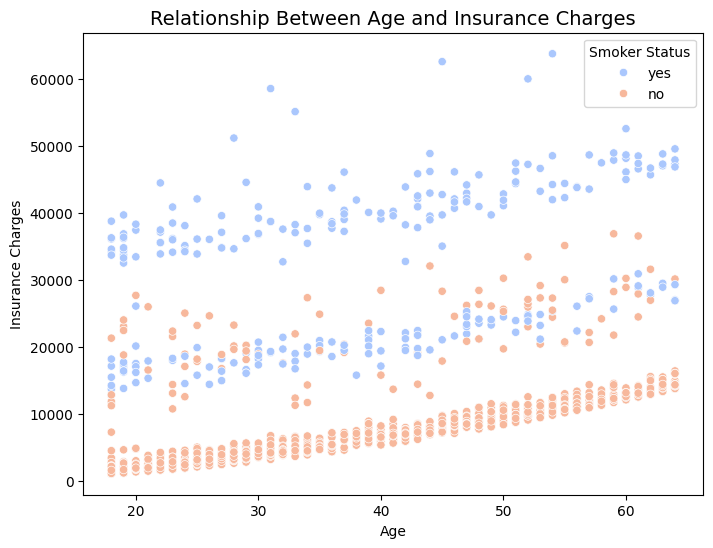

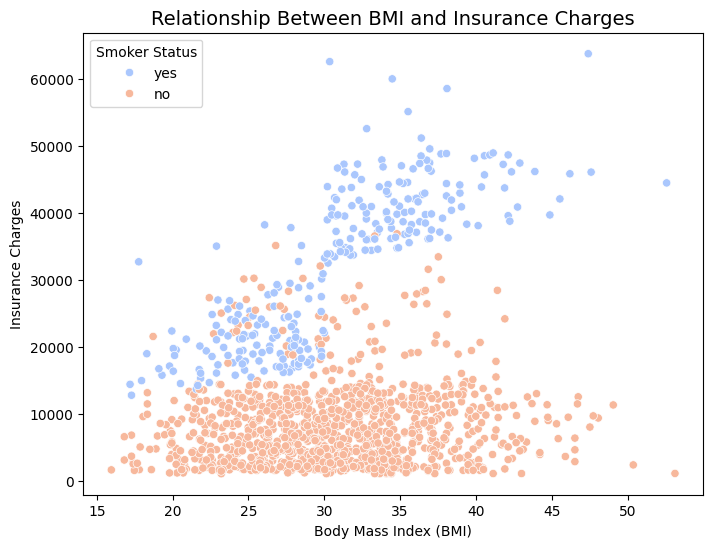

In [42]:
# Age vs Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Relationship Between Age and Insurance Charges', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker Status')
plt.show()

# BMI vs Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm')
plt.title('Relationship Between BMI and Insurance Charges', fontsize=14)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker Status')
plt.show()

### Age vs Insurance Charges
#### Insurance charges generally increase with age. Smokers (blue dots) exhibit substantially higher charges, often exceeding 40,000, particularly in older age groups. In contrast, non-smokers (orange dots) tend to have lower charges, mostly remaining below 30,000, though still increasing gradually with age. This indicates that both age and smoking status are key drivers of higher insurance costs.

### BMI vs Insurance Charges
#### Insurance charges show no strong linear relationship with BMI alone. However, smokers (blue dots) consistently incur higher charges, with peaks exceeding 50,000, even across a range of BMI values. Non-smokers (orange dots) predominantly cluster around 10,000–20,000 in charges, regardless of BMI. This suggests that smoking status plays a more dominant role in influencing costs than BMI alone, though very high BMI values may still contribute to outlier cases.

## Correlation Heatmap

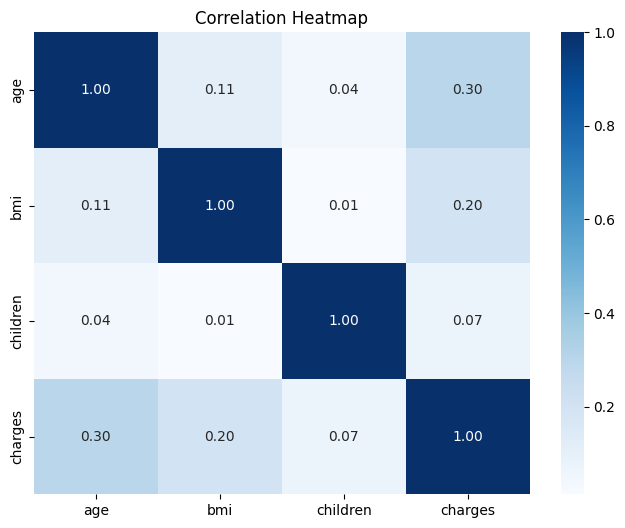

In [45]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Insights
#### The correlation heatmap highlights the relationships between key numerical variables: age, BMI, number of children, and insurance charges.

- #### Age shows a moderate positive correlation with charges (0.30), suggesting that older individuals tend to incur higher insurance costs.

- #### BMI has a weaker positive correlation with charges (0.20), indicating that higher BMI values may contribute to increased costs, though the relationship is not very strong.

- #### The number of children has minimal correlation with charges (0.07), suggesting that family size alone does not strongly influence insurance charges.

- #### Other pairwise correlations (age-BMI, age-children, BMI-children) are very weak (0.01 to 0.11) and likely not meaningful in predicting charges.

#### As expected, the diagonal values are 1.00, representing the perfect correlation of each variable with itself.

#### Overall, this analysis indicates that age and BMI are the most relevant numerical predictors of insurance charges among the variables considered.

## Final Feature Summary & Preprocessing Plan

### Preprocessing Plan
### Categorical Features:
- #### sex, smoker, region → will be encoded using One-Hot Encoding.

### Numeric Features:
- #### age, bmi → will be scaled (either with RobustScaler or StandardScaler) to improve model performance and handle potential outliers.

### Children Feature:
- #### children is a small integer feature can be either:

    - #### Passed through without scaling or

    - ##### Scaled

### Target Variable:
#### charges, continuous numeric target for regression.

### Summary
#### This preprocessing plan ensures that the data is well-prepared for regression models, with categorical variables properly encoded and numeric variables appropriately scaled or handle

## Preprocessing & Modeling

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,  r2_score

### Define feature sets

In [53]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi']
passthrough_features = ['children']

### Preprocessor

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', RobustScaler(), numeric_features),
        ('pass', 'passthrough', passthrough_features)
    ]
)

### Pipeline

In [57]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## Split data

In [59]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
## Fit
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', RobustScaler(),
                                                  ['age', 'bmi']),
                                                 ('pass', 'passthrough',
                                                  ['children'])])),
                ('regressor', LinearRegression())])

## Predict

In [62]:
y_pred = model_pipeline.predict(X_test)

### Evaluate

In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 4177.05
Mean Squared Error (MSE): 35478020.68
Root Mean Squared Error (RMSE): 5956.34
R² Score: 0.81


### Business Interpretation
- #### The R² score of 0.81 indicates that the model explains approximately 81% of the variance in insurance charges — a strong result for a simple Linear Regression model.

- #### On average, the model's predictions are off by about $4,177 (MAE), which is acceptable given the wide range of insurance charges in the dataset.

- #### The relatively low RMSE (~$5,956) suggests that the model is able to handle most predictions reasonably well, though some larger errors do occur (likely driven by outliers such as high charges for smokers or certain age groups).

In [70]:
import optuna
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [76]:
# Define objective function for Optuna
def objective(trial):
    # Select scaler
    scaler_name = trial.suggest_categorical("scaler", ["RobustScaler", "StandardScaler", "MinMaxScaler"])
    if scaler_name == "RobustScaler":
        scaler = RobustScaler()
    elif scaler_name == "StandardScaler":
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    
    # Polynomial degree
    poly_degree = trial.suggest_int("poly_degree", 1, 3) 
    
    # Model choice: LinearRegression or Ridge
    model_name = trial.suggest_categorical("model", ["LinearRegression", "Ridge"])
    if model_name == "LinearRegression":
        model = LinearRegression()
    else:
        alpha = trial.suggest_float("alpha", 0.1, 10.0, log=True)
        model = Ridge(alpha=alpha)
    
    # Build full pipeline
    numeric_pipeline = Pipeline([
        ("scaler", scaler),
        ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False))
    ])
    
    # Full ColumnTransformer
    preprocessor = ColumnTransformer([
        ("num", numeric_pipeline, numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ])
    
    # Full model pipeline
    full_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Cross-validation R2 score
    scores = cross_val_score(full_pipeline, X, y, cv=5, scoring="r2")
    return scores.mean()

In [78]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, timeout=600)

# Best parameters and score
best_params = study.best_params
best_score = study.best_value

[I 2025-06-07 17:52:23,999] A new study created in memory with name: no-name-99d96bd7-600d-4be9-a820-754992893041
[I 2025-06-07 17:52:24,075] Trial 0 finished with value: 0.7453853870852971 and parameters: {'scaler': 'StandardScaler', 'poly_degree': 3, 'model': 'Ridge', 'alpha': 4.955768560842327}. Best is trial 0 with value: 0.7453853870852971.
[I 2025-06-07 17:52:24,132] Trial 1 finished with value: 0.7459352579725371 and parameters: {'scaler': 'MinMaxScaler', 'poly_degree': 2, 'model': 'Ridge', 'alpha': 0.11142878726248899}. Best is trial 1 with value: 0.7459352579725371.
[I 2025-06-07 17:52:24,192] Trial 2 finished with value: 0.745470803075073 and parameters: {'scaler': 'RobustScaler', 'poly_degree': 3, 'model': 'LinearRegression'}. Best is trial 1 with value: 0.7459352579725371.
[I 2025-06-07 17:52:24,253] Trial 3 finished with value: 0.745470803075073 and parameters: {'scaler': 'StandardScaler', 'poly_degree': 3, 'model': 'LinearRegression'}. Best is trial 1 with value: 0.745935

In [80]:
best_params, best_score

({'scaler': 'MinMaxScaler',
  'poly_degree': 3,
  'model': 'Ridge',
  'alpha': 0.3136893658232858},
 0.7461471317127069)

### Hyperparameter Tuning with Optuna
#### To further optimize the performance of the regression pipeline, we applied Optuna, an advanced hyperparameter optimization framework. We tuned the following components:

- #### Scaler: RobustScaler, StandardScaler, MinMaxScaler

- #### Polynomial Degree: Degree 1 (no poly), 2, 3

- #### Model Type: LinearRegression, Ridge Regression (with tunable alpha)

### Best Cross-Validated R² Score:
**0.7461**

### Insights:
- #### The Ridge Regression model with polynomial degree 3 and MinMaxScaler performed the best.

- #### However, it did not outperform the original Linear Regression pipeline (R² ≈ 0.81).

- #### This suggests that the relationships in the data are primarily linear and additional complexity (polynomials / regularization) did not improve predictive performance.

- #### Thus, for business deployment, the simple Linear Regression pipeline remains the best choice: highly interpretable, fast to train, and effective.

## Shap Feature Importance

In [86]:
import shap

In [87]:
# extracting preprocessor from pipeline
preprocessor = model_pipeline.named_steps['preprocessor']

# Transforming X to get numerical matrix
X_transformed = preprocessor.transform(X)

# Geting feature names after OneHotEncoder + Scaler
feature_names = preprocessor.get_feature_names_out()

X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

## Summary Plot

In [91]:
# Now extract the trained Linear Regression model
model_lr = model_pipeline.named_steps['regressor']

# Using SHAP LinearExplainer
explainer = shap.LinearExplainer(model_lr, X_transformed_df)

# Compute SHAP values
shap_values = explainer.shap_values(X_transformed_df)

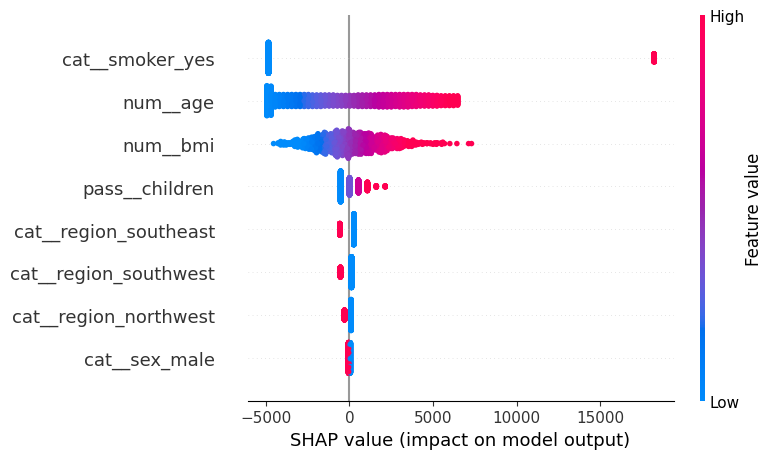

In [93]:
# Summary plot with feature names
shap.summary_plot(shap_values, X_transformed_df)

## SHAP Feature Importance Summary
#### The SHAP summary plot provides a detailed view of how each feature influences the model’s predictions for insurance charges:

- #### X-axis: SHAP value shows the impact on the predicted charges (positive or negative).

- #### Y-axis: Features, ordered by importance.

- #### Color: Feature value, red = high, blue = low.

### Key Business Insights:
- #### Smoking status (cat_smoker_yes) is by far the most influential factor. Smokers (red) contribute to an increase in charges of up to ~20,000.

- #### Age (num_age) and BMI (num_bmi) also strongly influence charges. Older age and higher BMI both push predicted charges higher.

- #### Number of children (pass_children), region, and sex have smaller, mixed effects — typically within a range of ±5,000 — indicating they contribute to charges but with less magnitude.

### Conclusion:
- #### Smoking, age, and BMI are the primary drivers of insurance costs in this dataset.

- #### This insight can help insurers focus on these key risk factors when setting premiums or designing health programs

## Actual vs Predicted Plot

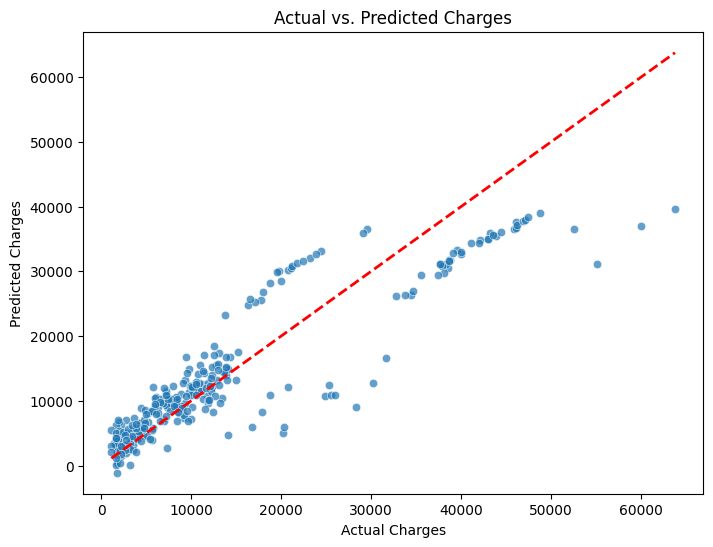

In [104]:
y_pred = model_pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

### Actual vs. Predicted Charges

##### The scatter plot of Actual vs. Predicted Charges shows how well the model is performing. The red dashed line represents the ideal scenario where predictions perfectly match actual values. The majority of points are clustered around this line, indicating good predictive performance. Some variance is observed, especially at higher charge values, which is expected in real-world data.

## Residuals Plot

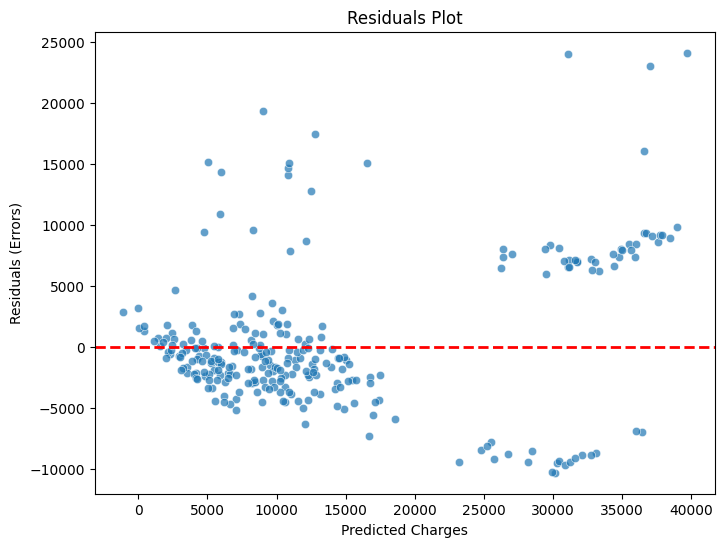

In [107]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals Plot')
plt.show()

### Residuals Plot

##### The residuals plot displays the distribution of errors (actual - predicted). Ideally, residuals should be randomly scattered around zero, indicating that the model has no obvious pattern in its errors. In this plot, residuals are centered around zero for much of the data, but there are noticeable patterns and heteroscedasticity (larger spread of errors for higher predicted values), which suggests potential areas for model improvement or the presence of non-linear relationships not captured by the linear model.

# Conclusion

### Key Patterns Discovered
- #### Insurance charges exhibit a right-skewed distribution, with most individuals incurring lower to moderate costs, and a few incurring very high charges.

- #### Smokers are a major driver of higher insurance costs. Boxplots and SHAP analysis confirm that smokers pay significantly more — often more than 3–4 times compared to non-smokers.

- #### Age is positively correlated with charges — older individuals generally face higher costs.

- #### BMI also contributes to higher charges, particularly at very high BMI levels.

- #### Region, sex, and number of children show relatively smaller, but still notable, effects on insurance charges.

### Best Model Selected
- #### Linear Regression was used as the required baseline model.

- #### Optuna hyperparameter tuning explored more complex pipelines (scaling, polynomial features, regularization). However, after tuning:

    - #### The best Ridge model with degree-3 polynomial features achieved R² ≈ 0.75 on the validation set.

    - #### The original simple Linear Regression achieved R² ≈ 0.81, making it the best-performing and simplest model overall.

# Model Performance

## Metrics

| Metric    | Value  |
|-----------|--------|
| MAE       | ~4177  |
| RMSE      | ~5956  |
| R² Score  | ~0.81  |

### The model explains about 81% of the variance in insurance charges — a strong result given the data’s complexity and variability.

### Business Recommendations
- #### Smoking status should be a critical factor in premium pricing and risk management. Insurers may consider:

    - #### Higher premiums for smokers.

    - #### Incentives for smoking cessation programs.

- #### Age-based pricing tiers make sense, as older age correlates with higher costs.

- #### BMI management could be integrated into wellness programs to help control future insurance expenses.

- #### Children count and region have limited impact — these may not need as much weight in pricing models.

### Final Remarks
- #### The analysis provides clear evidence of key risk factors influencing insurance costs.

- #### A simple Linear Regression model — with appropriate preprocessing — offers a strong and interpretable baseline for predicting insurance charges.

- #### For production use, further steps could include:

    - #### Incorporating more features (health conditions, income, lifestyle).

    - #### Performing advanced tuning and ensemble modeling to further improve accuracy.

    - #### Applying SHAP explainability to monitor fairness and transparency.